In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

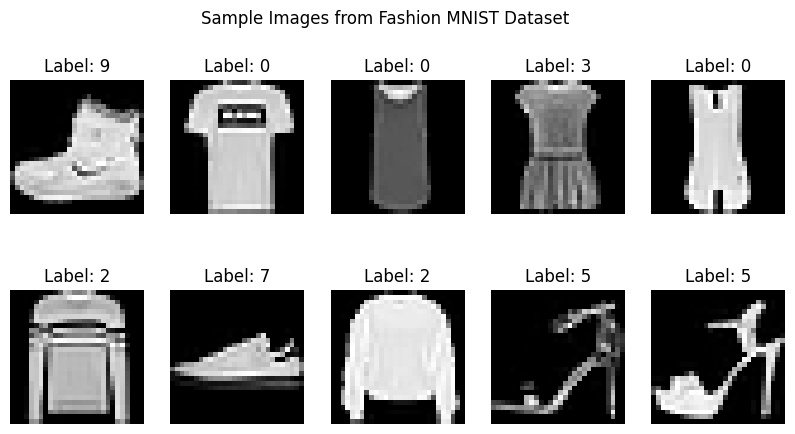

In [2]:
# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display some sample images from the dataset with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST Dataset")
plt.show()


In [3]:
# Print data shapes after loading
print("Data Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data Shapes:
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
# Reshape data to fit CNN model
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
print("\nData reshaped for CNN input.")

# Print data shapes after reshaping
print("Data Shapes after Reshaping:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Data reshaped for CNN input.
Data Shapes after Reshaping:
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [6]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nModel compiled successfully.")
print("\nModel Summary:")
model.summary()


Model compiled successfully.

Model Summary:


d:\Basudev\genaiprereq\Day1\gnipre\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
print("\nStarting model training...")
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
print("Model training completed.")


Starting model training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5013 - loss: 1.3622 - val_accuracy: 0.7366 - val_loss: 0.7141
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7447 - loss: 0.6764 - val_accuracy: 0.7673 - val_loss: 0.6292
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7805 - loss: 0.5905 - val_accuracy: 0.7772 - val_loss: 0.5958
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7968 - loss: 0.5407 - val_accuracy: 0.8090 - val_loss: 0.5166
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8178 - loss: 0.4867 - val_accuracy: 0.8142 - val_loss: 0.4969
Model training completed.


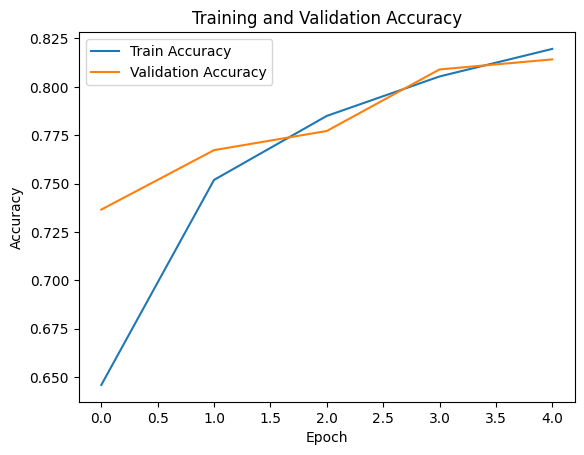

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Predictions
print("\nMaking predictions on test data...")
y_pred = model.predict(X_test).argmax(axis=1)
print("Predictions completed.")


Making predictions on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predictions completed.


0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


Confusion Matrix:
[[763   4  37 104  13   2  60   0  17   0]
 [  1 948   1  40   7   1   0   0   2   0]
 [ 10   2 724  18 207   1  26   0  12   0]
 [ 14  16  28 879  44   0  13   0   6   0]
 [  0   2  88  39 842   1  21   0   7   0]
 [  0   0   0   1   0 894   0  75   5  25]
 [174   2 204  76 267   0 256   0  21   0]
 [  0   0   0   0   0  23   0 948   0  29]
 [  1   3  20   5   5   2   4   5 953   2]
 [  0   0   0   0   0   9   0  55   1 935]]


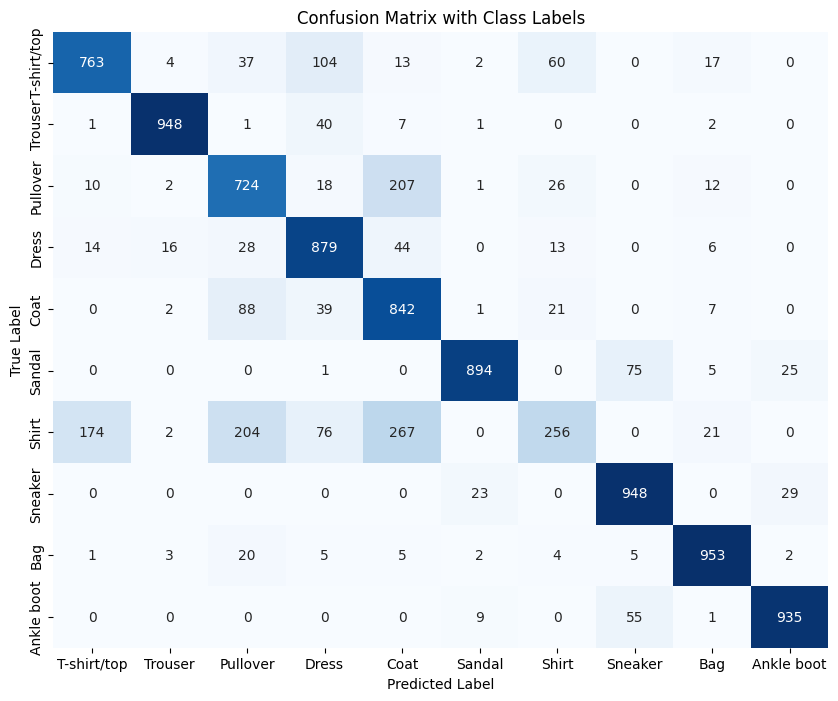

In [11]:

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Labels')
plt.show()

In [12]:
# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1000
           1       0.97      0.95      0.96      1000
           2       0.66      0.72      0.69      1000
           3       0.76      0.88      0.81      1000
           4       0.61      0.84      0.71      1000
           5       0.96      0.89      0.92      1000
           6       0.67      0.26      0.37      1000
           7       0.88      0.95      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



In [13]:
# Save test predictions with image index and class
test_results = pd.DataFrame({'image_index': np.arange(len(y_test)), 'actual': y_test, 'predicted': y_pred})
print("\nSample of test results with actual and predicted labels:")
print(test_results.head())

test_results.to_csv('fashion_mnist_test_predictions.csv', index=False)
print("Test predictions saved to fashion_mnist_test_predictions.csv")


Sample of test results with actual and predicted labels:
   image_index  actual  predicted
0            0       9          9
1            1       2          2
2            2       1          1
3            3       1          1
4            4       6          6
Test predictions saved to fashion_mnist_test_predictions.csv
